# Loan Approval Prediction

**HuggingFace**

https://huggingface.co/spaces/SGVKE/LoanApproval

**Objective(Background)**

As part of the data science team in this company, I have been assigned to develop a predictive model aimed at streamlining and supporting the efforts of the marketing team. Currently, the marketing team spends a significant amount of time manually identifying potential loan approvals, which can be time-consuming and inefficient. The goal of this predictive model is to allow the marketing team to focus solely on applicants who are most likely to have their loans approved, based on data-driven insights.

By using the model, applicants predicted to be approved can receive more attention, while those predicted to be not approved can be deprioritized. This approach ensures that the marketing team doesn't waste valuable time on low-probability candidates, allowing them to increase efficiency, improve decision-making, and ultimately drive more successful loan conversions.

This predictive system will reduce the workload of the marketing team, enabling them to focus their efforts on high-quality leads and boosting overall productivity and ROI for the company.

**Data Source**

The data source consists of information about individual applicant details, financial metrics, and loan-specific factors. You can view the data using this [link]('https://www.kaggle.com/datasets/itshappy/ps4e9-original-data-loan-approval-prediction').

**Data Description**

The data contains 32,581 entries across 12 columns with 7 numerical colums, 4 categorical columns and 1 column as target.

 Columns | Data Type | Decription
 ---|---|---
 person_age | Int | Applicant's age in years.
 person_income | Float | Annual income of the applicant in USD.
 person_home_ownership | Object | Status of homeownership.
 person_emp_length | Float | Length of employment in years.
 loan_intent | Object | Purpose of the loan.
 loan_grade | Object | Risk grade assigned to the loan, assessing the applicant's creditworthiness.
 loan_amnt | Float | Total loan amount requested by the applicant.
 loan_int_rate | Float | Interest rate associated with the loan.
 loan_status (target) | Object | The approval status of the loan(approved or not approved).
 loan_percent_income | Float | Percentage of the applicant's income allocated towards loan repayment.
 cb_person_default_on_file | Object | Indicates if the applicant has a history of default ('Y' for yes, 'N' for no).
 cb_person_cred_hist_length | Int | Length of the applicant's credit history in years.

**Problem Statement**

The goal is to develop a machine learning model to predict loan approval status based on individual applicant details, financial metrics, and loan-specific factors. This model will support the marketing team by focusing on applicants with a higher likelihood of loan approval, reducing time spent on low-probability cases. The model’s performance will be measured by achieving a recall score of at least 90%, ensuring the majority of potential approvals are identified. Leveraging the existing dataset of 32,581 records, the data science team will preprocess the data, handle missing values, and apply machine learning algorithms to meet the target recall. This project is essential for improving marketing efficiency and increasing loan conversions, with the model being developed, tested, and deployed within a 1-week.

**Problem Breakdown**

- Descriptive Statistics
    - Numerical Columns
        1. What are the mean, median, standard deviation, minimum, and maximum values for the numerical columns?
    - Categorical Columns
        1. What is the frequency distribution of each categorical column?
- Inferential Statistics
    - Correlation Analysis
        1. What relationships can be identified between the numerical features and the target variable (`loan_status`) through correlation analysis?
- Data Visualization
    1. What is the overall distribution of the data?
        - Is the distribution of `loan_status` balanced or imbalanced?
    2. What are the most common loan intents among applicants based on the distribution of `loan_intent`?
    3. What are the most common age ranges among loan applicants, based on the age distribution?
    4. How are applicants distributed across different credit risk grades, based on the percentage breakdown of `loan_grade`?
    5. What is the relationship between `loan_amnt` and `loan_status`? Are larger loans more or less likely to be approved?
    6. How does `person_income` relate to `loan_status`? Does income level play a key role in loan approval?
    7. How does `person_home_ownership` relate to `loan_status`? Does homeownership influence the likelihood of loan approval?

# ii. Import Libraries

In [1]:
# DataFrame
import pandas as pd
import numpy as np

# Visualization Data
from matplotlib import pyplot as plt
import seaborn as sns

# Feature Engineering
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTENC
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder


# Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

# Evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, recall_score, roc_auc_score

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Export
import pickle

# Handle Warnings
import warnings
warnings.filterwarnings('ignore')

# iii. Data Loading

Before conducting any anaysis, it is essential to first load the data. This step ensures that we have access to all necessary information for accurate and informed analysis.

## Load Data

In [2]:
# Load the dataset
data_loading = pd.read_csv('credit_risk_dataset.csv')

In [3]:
# Show 10 first data from dataset
data_loading.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


In [4]:
# Show 10 last data from dataset
data_loading.tail(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32571,60,45600,RENT,1.0,VENTURE,B,20000,10.00,1,0.44,N,26
32572,52,52000,OWN,0.0,PERSONAL,A,9600,8.49,0,0.18,N,22
32573,56,90000,MORTGAGE,0.0,PERSONAL,A,7200,6.17,0,0.08,N,19
32574,52,65004,RENT,4.0,PERSONAL,D,20000,15.58,1,0.31,Y,19
32575,52,64500,RENT,0.0,EDUCATION,B,5000,11.26,0,0.08,N,20
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


## Data Summary

In [5]:
# Show the basic info of data
data_loading.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


From the basic info or data summary, we can extract the following information:
1. The dataset contains 12 columns and 32,581 entries.
2. There are 11 columns designated as features.
3. There is 1 column designated as target(`loan_status`).
4. There are 2 columns with missing values(`person_emp_length` and `loan_int_rate`).

# iv. Exploratory Data Analysis (EDA)

This phase will allow us to further understand the dataset's structure and relationships among the feature. To begin, we will copy the data for our analysis and ensure that we working with a clean, intact version of the original dataset.

In [6]:
# Data copy for EDA
data_EDA = data_loading.copy()

## Missing Value Analysis

In [7]:
# Check number of missing values
data_EDA.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

Upon checking for missing values, we identified 2 columns with missing data:

1. `person_emp_length`  : 895 missing values,
2. `loan_int_rate` : 3,116 missing values.

In [8]:
# Check values columns that have missing values in person_emp_length
data_EDA[data_EDA['person_emp_length'].isna()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
105,22,12600,MORTGAGE,NaN,PERSONAL,A,2000,5.42,1,0.16,N,4
222,24,185000,MORTGAGE,NaN,EDUCATION,B,35000,12.42,0,0.19,N,2
379,24,16800,MORTGAGE,NaN,DEBTCONSOLIDATION,A,3900,NaN,1,0.23,N,3
407,25,52000,RENT,NaN,PERSONAL,B,24000,10.74,1,0.46,N,2
408,22,17352,MORTGAGE,NaN,EDUCATION,C,2250,15.27,0,0.13,Y,3
...,...,...,...,...,...,...,...,...,...,...,...,...
32285,38,12000,OWN,NaN,EDUCATION,A,4800,7.29,1,0.40,N,12
32328,51,18408,RENT,NaN,PERSONAL,C,1000,14.65,1,0.05,Y,20
32360,70,39996,RENT,NaN,MEDICAL,C,3600,15.23,0,0.09,Y,19
32453,56,32400,RENT,NaN,MEDICAL,A,8575,7.51,0,0.26,N,18


In [9]:
# Check values columns that have missing values in loan_int_rate
data_EDA[data_EDA['loan_int_rate'].isna()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
39,23,71500,RENT,3.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.42,N,4
50,24,78000,RENT,4.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.38,Y,4
57,23,277000,OWN,3.0,PERSONAL,A,35000,NaN,0,0.13,N,4
59,24,12000,OWN,2.0,VENTURE,E,1750,NaN,0,0.15,Y,3
62,26,263000,MORTGAGE,0.0,EDUCATION,B,10000,NaN,1,0.04,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32547,53,4888,OWN,0.0,VENTURE,C,1400,NaN,1,0.29,Y,28
32552,65,45900,RENT,2.0,EDUCATION,C,10000,NaN,0,0.22,Y,19
32553,54,20000,RENT,2.0,MEDICAL,C,5000,NaN,0,0.25,N,28
32569,51,60000,MORTGAGE,1.0,PERSONAL,A,7500,NaN,0,0.13,N,23


In [10]:
# Show percentage of missing value
print(f'% of missing values : {(data_EDA.isna().sum().sum()/data_EDA.shape[0])*100}')

% of missing values : 12.310856020379976


From the data, we can conlude that the missing values fall into the following type:

1. MAR(Missing at Random):
    - Columns : `loan_int_rate`
    - The missing values in this column are correlated with other columns, such as `loan_grade`.
1. MNAR(Missing Not at Random):
    - Columns : `person_emp_length`
    - The missing values in this column occur because the applicant chose not to disclose how many years they have worked.

Since the percentage of missing values is above 5%, the missing data will be handled using the mean or median.

## Problem Analysis

### Descriptive Statistics

#### Numerical Columns

1. What are the mean, median, standard deviation, minimum, and maximum values for the numerical columns?

In [11]:
# Show the basic information of descriptive statistics from numerical columns
data_EDA.describe(exclude='object').drop(columns='loan_status').T

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00


From the data above, we can get insight:
1. The average age of the applicants is 27 years, with a minimum age of 20 and a maximum age of 144. This likely indicates that the target applicants are individuals who may not yet have permanent jobs or homes. However, since the standard deviation is quite high for this attribute, further analysis is needed to obtain clearer insights. This suggests an outlier in the maximum age, as it exceeds 100.

2. The average income of the applicants is $66,000, with a minimum income of $4,000 and a maximum income of $6,000,000. This suggests that applicants with lower incomes are less likely to apply for loans, as the lower quartile of the data is $38,500. We can conclude that applicants applying for loans tend to have higher incomes. Given the wide range of income values, there are likely many outliers in the data.

3. The average work length of the applicants is 4 years, with a minimum of 0 years and a maximum of 123 years. This suggests a wide variety of applicants, ranging from new employees to those with many years of experience. However, since the standard deviation is quite high for this attribute, further analysis is needed to obtain clearer insights. The maximum work length also indicates an outlier, as it exceeds 100 years.

4. The average loan amount requested by applicants is around $9,500, with a minimum loan of $500 and a maximum of $35,000. The range of loan amounts spans from $500 to $35,000. The wide range in loan amounts suggests that applicants have varying financial needs, from small personal loans to larger, more substantial loan requests. The average loan of $9,500 indicates that many applicants may be seeking mid-range loans, possibly for personal expenses or small investments.

5. The average interest rate on loans requested by applicants is around 11%, with a minimum interest rate of 5% and a maximum of 23%. The average interest rate of 11% suggests that the loans being requested fall within a moderate to slightly high range, which may reflect the credit risk associated with the applicant pool. The minimum interest rate of 5% could indicate that some applicants are receiving competitive rates, possibly due to strong creditworthiness, while the maximum rate of 23% may signify higher-risk applicants who are likely being charged more due to perceived risk.

6. The average percentage of income allocated to loan repayment is around 17%, with a minimum of 0% and a maximum of 83%. The average of 17% suggests that most applicants are committing a moderate portion of their income to loan repayments, which could indicate a manageable debt burden for many. However, the wide range, especially the maximum of 83%, points to a subset of applicants who are dedicating a substantial portion of their income to loan repayments. This could be a potential red flag for loan approval, as a high debt-to-income ratio often increases the likelihood of default.

7. The average credit history length for applicants is around 6 years, with a minimum of 2 years and a maximum of 30 years. The average of 6 years indicates that many applicants have a relatively short credit history, which may reflect a younger or less experienced borrower base. The maximum length of 30 years suggests that there are also applicants with long-established credit histories, potentially signifying more financially stable or experienced borrowers. Applicants with shorter credit histories might face more difficulty in obtaining loan approvals, as lenders often view a longer credit history as a sign of reliability.

#### Categorical Columns

1. What is the frequency distribution of each categorical column?

In [12]:
# Show the basic information of descriptive statistics from categorical columns
data_EDA.describe(include='object').T

,count,unique,top,freq
person_home_ownership,32581,4,RENT,16446
loan_intent,32581,6,EDUCATION,6453
loan_grade,32581,7,A,10777
cb_person_default_on_file,32581,2,N,26836


From the data above, we can get insight:
1. Most of the applicants' home ownership status is renting.
    - This suggests that a significant portion of applicants might not have accumulated enough wealth to purchase a home, potentially indicating younger individuals or those in the earlier stages of their careers. Renting could also reflect financial instability, which might influence loan approval decisions, as homeownership is often seen as a sign of financial security.
2. Most applicants cite education as the reason for their loan.
    - This trend indicates that a large number of applicants are likely seeking loans to finance their education, which could mean many borrowers are students or individuals looking to upskill. Education loans can be seen as an investment in future earning potential, but lenders may also consider the current income and repayment ability of these applicants.
3. Most of the applicants' loan grade is A.
    - A loan grade of A suggests that many applicants are perceived as low-risk borrowers, based on factors like credit history, income, and overall financial stability. This could indicate that the applicant pool contains individuals with strong financial profiles, which would lead to a higher likelihood of loan approval and potentially lower interest rates.
4. Most of the applicants have no history of default or credit.
    - A lack of default history indicates that many applicants have a clean credit record, making them attractive candidates for loan approvals. This suggests that the applicant pool is generally composed of responsible borrowers who have managed their credit well, reducing the risk for lenders.

### Inferential Statistics

#### Correlation Analysis
1. What relationships can be identified between the numerical features and the target variable (`loan_status`) through correlation analysis?

In [13]:
def correlation_checking_num_cat(X_train, y_train, variable):
    '''
    This function is use to check correlation for numerical feature and categorical target.

    Parameter:
    X_train is data train
    y_train is target train
    skew is output from skewness function
    variable is name of columns that categorical
    '''
    # Make blank list
    dt = []
    # Looping for value in variable
    for i in variable:
        # Calculate the correlation
        cor, p_val = stats.kendalltau(X_train[i], y_train)
        # Condition when p_val less than 0.05
        if p_val < 0.05:
            dt.append([i, "Kendall", str(cor), p_val, True])
        # Condition when p_val more than 0.05
        else:
            dt.append([i, "Kendall", str(cor), p_val, False])
    return pd.DataFrame(dt, columns=['Column Name', 'Correlation Type', 'Correlation Value', 'P-Value', 'Have Correlation'])


In [14]:
# dropping missing value for correlation checking
data_EDA_1 = data_EDA.dropna()

In [15]:
# List numerical columns
num = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

In [16]:
# Check correlation numerical columns with target
correlation_checking_num_cat(data_EDA_1, data_EDA_1['loan_status'], num)

,Column Name,Correlation Type,Correlation Value,P-Value,Have Correlation
0,person_age,Kendall,-0.02856210724466034,1.038516e-08,True
1,person_income,Kendall,-0.21718645909209375,0.000000e+00,True
2,person_emp_length,Kendall,-0.08371610449270239,2.990667e-62,True
3,loan_amnt,Kendall,0.07698301603316532,8.847004e-56,True
4,loan_int_rate,Kendall,0.2661135338955455,0.000000e+00,True
5,loan_percent_income,Kendall,0.2600081350325883,0.000000e+00,True
6,cb_person_cred_hist_length,Kendall,-0.020638539480160922,5.144828e-05,True


From the data above, we can get insight that all numerical columns have correlation with the target or loan_status.

1. person_age (Correlation: -0.03, p-value: 1.04e-08)
    - There is a slight negative correlation between age and loan approval status. Although the correlation is weak, it suggests that younger applicants may have a marginally higher chance of loan approval compared to older applicants. The small p-value indicates that the correlation is statistically significant.

2. person_income (Correlation: -0.22, p-value: 0.00)
    - There is a moderate negative correlation between income and loan approval status. This suggests that applicants with higher incomes are less likely to have their loans approved, which might indicate that higher-income individuals either apply for riskier loans or that the model may favor lower-income applicants for approval. The correlation is significant with a p-value of 0.00.

3. person_emp_length (Correlation: -0.08, p-value: 2.99e-62)
    - There is a weak negative correlation between employment length and loan approval status. This suggests that the length of employment has only a minor effect on loan approval, with longer employment being slightly associated with lower approval chances. The p-value indicates that this relationship is statistically significant.

4. loan_amnt (Correlation: 0.08, p-value: 8.85e-56)
    - A weak positive correlation exists between loan amount and loan approval status. This suggests that applicants requesting higher loan amounts are slightly more likely to have their loans approved. However, the effect size is small, though the result is statistically significant.

5. loan_int_rate (Correlation: 0.27, p-value: 0.00)
    - A moderate positive correlation between interest rates and loan approval status indicates that loans with higher interest rates tend to be approved more often. This may reflect higher-risk loans being approved with higher interest rates to compensate for risk. The result is highly significant with a p-value of 0.00.

6. loan_percent_income (Correlation: 0.26, p-value: 0.00)
    - A moderate positive correlation suggests that loans where a higher percentage of the applicant's income is allocated to repayment are more likely to be approved. This could imply that lenders are approving loans for individuals who are stretching their income to meet loan requirements, though this could be risky in terms of repayment ability.

7. cb_person_cred_hist_length (Correlation: -0.02, p-value: 5.14e-05)
    - There is a very weak negative correlation between credit history length and loan approval. This suggests that applicants with longer credit histories are only slightly less likely to have their loans approved. While the effect size is small, the result is statistically significant.

Most correlations are relatively weak, but the statistically significant p-values indicate that these variables do have some impact on loan approval. Stronger correlations with variables like interest rate and loan percent of income suggest that financial metrics play a key role in loan approval decisions.

### Data Visualization

1. What is the overall distribution of the data?
    - Is the distribution of `loan_status` balanced or imbalanced?

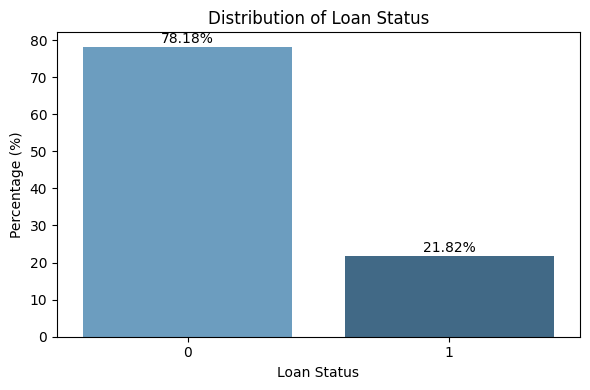

In [17]:
# Count the occurrences of each loan status
loan_status_counts = data_EDA['loan_status'].value_counts(normalize=True) * 100

# Plot the bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x=loan_status_counts.index, y=loan_status_counts.values, palette='Blues_d')
plt.title('Distribution of Loan Status')
plt.ylabel('Percentage (%)')
plt.xlabel('Loan Status')

# Show the percentage on the bars
for i, value in enumerate(loan_status_counts.values):
    plt.text(i, value + 1, f'{value:.2f}%', ha='center')

plt.tight_layout()
plt.show()

Based on the bar graph, we can get insight:
- The distribution of loan_status shows that only 21.82% of the loans are approved, while 78.18% are not approved.
- The data is highly imbalanced, with a significantly larger proportion of loans being rejected. This imbalance suggests that the majority of applicants may not meet the loan approval criteria. From a machine learning perspective, this imbalance could lead to challenges in building a predictive model, as the model may become biased towards predicting loan rejections.

2. What are the most common loan intents among applicants based on the distribution of `loan_intent`?

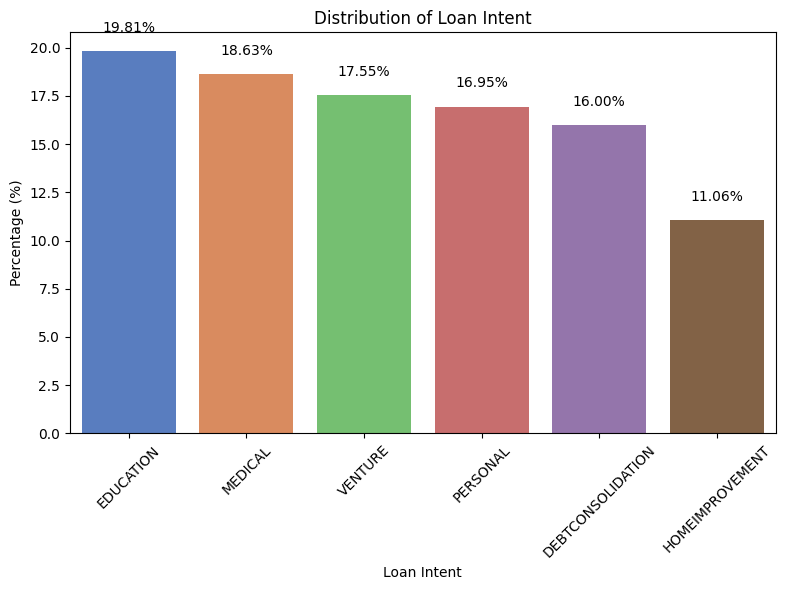

In [18]:
# Count the occurrences of each loan intent
loan_intent_counts = data_EDA['loan_intent'].value_counts(normalize=True) * 100

# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=loan_intent_counts.index, y=loan_intent_counts.values, palette='muted')
plt.title('Distribution of Loan Intent')
plt.ylabel('Percentage (%)')
plt.xlabel('Loan Intent')

# Show the percentage on the bars
for i, value in enumerate(loan_intent_counts.values):
    plt.text(i, value + 1, f'{value:.2f}%', ha='center')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Based on the graph, we can get insight:
- There are six types of loan intents: education, medical, venture, personal, debt consolidation, and home improvement.
- The most common loan intent is education, accounting for 19.81% of the data, while the least common is home improvement, at 11.06%.
- The breakdown for the other intents is as follows: medical at 18.63%, venture at 17.55%, personal at 16.95%, and debt consolidation at 16%.
- The high percentage of education-related loans suggests that a significant portion of applicants are using loans to invest in their education, potentially indicating younger individuals seeking to finance their studies. On the other hand, home improvement loans being the least common could suggest that fewer applicants are homeowners or that home renovation is a lower priority for the applicant pool. The relatively even distribution among the remaining intents (medical, venture, personal, and debt consolidation) indicates that applicants seek loans for various personal and financial reasons, with no single category dominating the others by a large margin.

3. What are the most common age ranges among loan applicants, based on the age distribution?

In [19]:
# Handling outlier in age
d = []
for i in data_EDA['person_age']:
    if i > 100:
        j = i-100
        d.append(j)
    else:
        d.append(i)
data_EDA['person_age'] = d

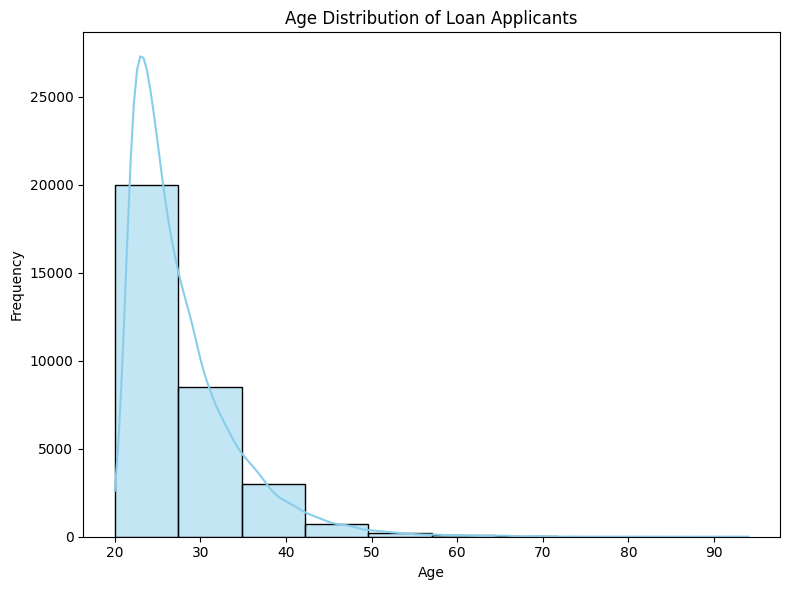

In [20]:
# Plotting the age distribution using a histogram
plt.figure(figsize=(8, 6))
sns.histplot(data_EDA['person_age'], bins=10, kde=True, color='skyblue')
plt.title('Age Distribution of Loan Applicants')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Based on the histogram of the age distribution of loan applicants:

1. Most common age range: 
    - The majority of applicants are between 20 and 30 years old. This suggests that younger individuals, potentially early in their careers, are the primary applicants for loans.

2. Gradual decline: 
    - There is a noticeable drop in frequency after the age of 30, with significantly fewer applicants in the 40+ age range. This may indicate that older individuals are less likely to apply for loans, possibly due to having more established financial stability.

3. Outliers: 
    - There are very few applicants above 60 years of age, which makes sense, as individuals closer to retirement age may rely less on loans.

4. How are applicants distributed across different credit risk grades, based on the percentage breakdown of `loan_grade`?

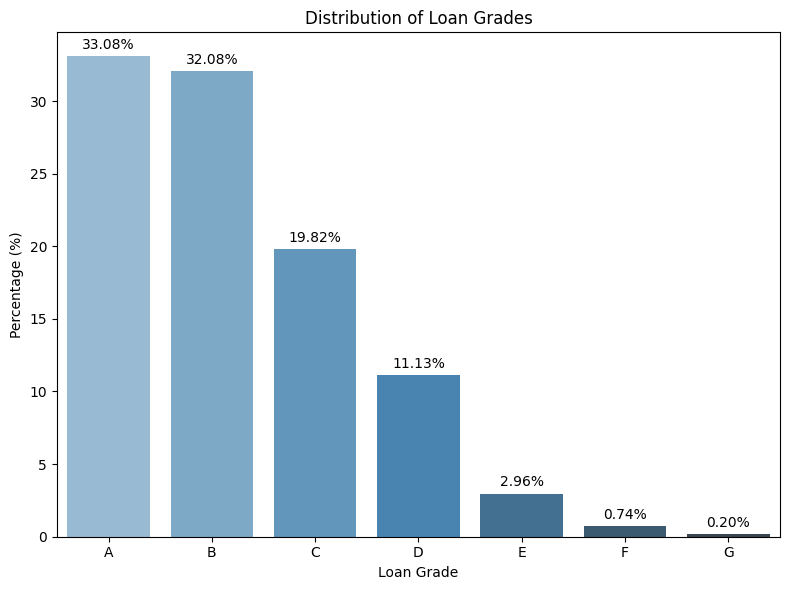

In [21]:
# Count the occurrences of each loan grade
loan_grade_counts = data_EDA['loan_grade'].value_counts(normalize=True) * 100

# Plot the bar chart for loan_grade distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=loan_grade_counts.index, y=loan_grade_counts.values, palette='Blues_d')
plt.title('Distribution of Loan Grades')
plt.ylabel('Percentage (%)')
plt.xlabel('Loan Grade')

# Show percentage on top of bars
for i, value in enumerate(loan_grade_counts.values):
    plt.text(i, value + 0.5, f'{value:.2f}%', ha='center')

plt.tight_layout()
plt.show()

Based on the bar chart of loan grade distribution:

1. Grades A and B dominate: 
    - Over 65% of applicants fall into loan grades A (33.08%) and B (32.08%), indicating that the majority of applicants are considered to have a high creditworthiness.

2. Grade C is moderately common: 
    - About 19.82% of applicants are in grade C, suggesting a moderate level of risk for these borrowers.

3. Lower grades are rare: 
    - Grades D, E, F, and G have fewer applicants. Grade D accounts for 11.13%, and it drops significantly for grades E (2.96%), F (0.74%), and G (0.20%). This shows that fewer applicants are classified as higher risk.

5. What is the relationship between `loan_amnt` and `loan_status`? Are larger loans more or less likely to be approved?

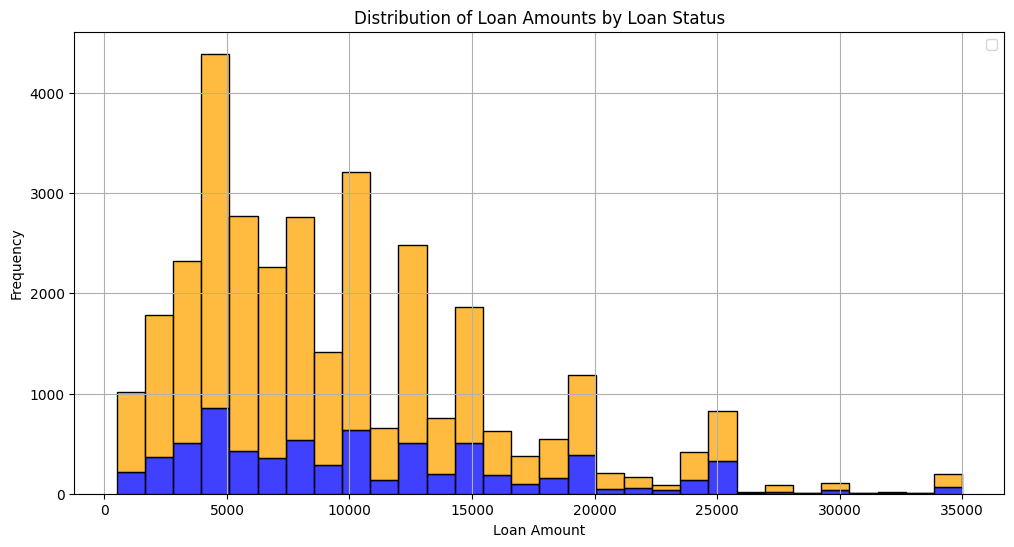

In [22]:
# Create the histogram
plt.figure(figsize=(12, 6))
sns.histplot(data=data_EDA, x='loan_amnt', hue='loan_status', multiple='stack', bins=30, palette={1 : 'green', 0 : 'orange'})
plt.title('Distribution of Loan Amounts by Loan Status')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.grid()
plt.legend()
plt.show()

The histogram of loan amount distributions does not indicate that larger loans are more likely to be approved. In fact, smaller to mid-sized loans (around $5,000 to $15,000) seem to have more approvals, while larger loans (above $15,000) show a decreasing approval rate. The approval proportion for larger loans is much smaller compared to mid-sized loans. This suggests that the bank may perceive larger loans as higher risk, or applicants seeking larger loans may not meet the required creditworthiness criteria as frequently. Therefore, mid-sized loans have a better approval rate than larger loans.

6. How does `person_income` relate to `loan_status`? Does income level play a key role in loan approval?

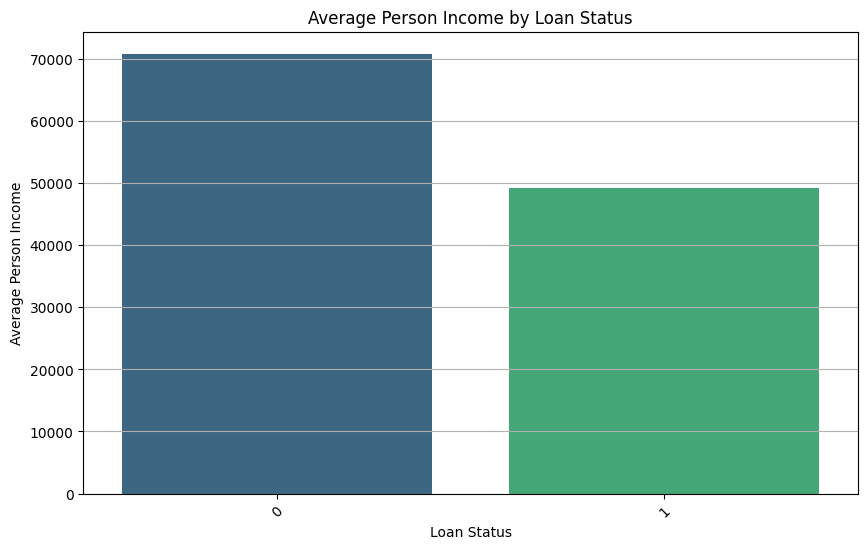

In [23]:
# Calculate the average income by loan status
income_status = data_EDA.groupby('loan_status')['person_income'].mean().reset_index()

# Create a bar chart to visualize the average income by loan status
plt.figure(figsize=(10, 6))
sns.barplot(x='loan_status', y='person_income', data=income_status, palette='viridis')
plt.title('Average Person Income by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Average Person Income')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Based on bar graph of average income:
- The bar graph illustrates that the average income for loans that were approved is lower than that for loans that were not approved. Specifically, the average income for approved loans is approximately $50,000, while for not approved loans, it is around $70,000. This suggests that individuals with higher income levels may have a lower likelihood of loan approval, which could indicate that other factors, such as creditworthiness or financial history, play a significant role in the approval process.

7. What are the most common home_ownership among applicants based on the distribution of `person_home_ownership`?

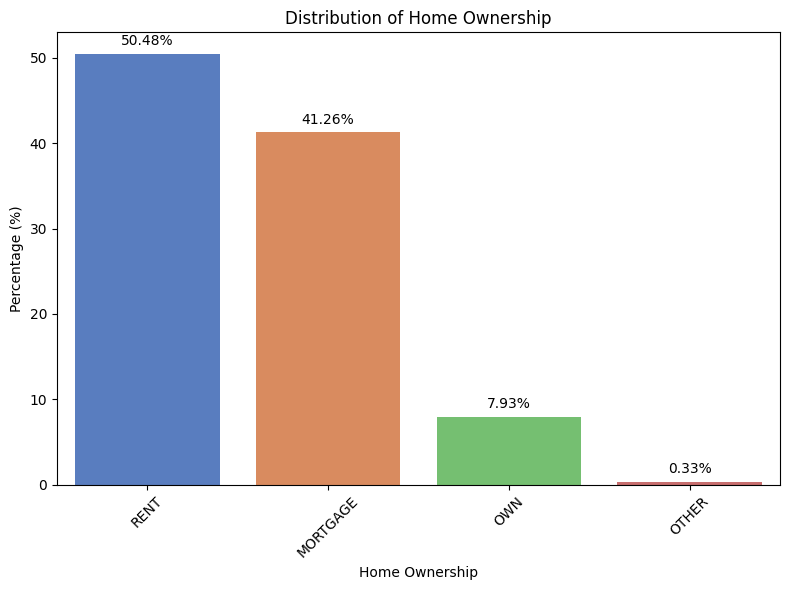

In [24]:
# Count the occurrences of each loan intent
home_counts = data_EDA['person_home_ownership'].value_counts(normalize=True) * 100

# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=home_counts.index, y=home_counts.values, palette='muted')
plt.title('Distribution of Home Ownership')
plt.ylabel('Percentage (%)')
plt.xlabel('Home Ownership')

# Show the percentage on the bars
for i, value in enumerate(home_counts.values):
    plt.text(i, value + 1, f'{value:.2f}%', ha='center')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Based on the graph, we can get insight:
- The distribution of person_home_ownership reveals four distinct categories: rent, mortgage, own, and other. The most common type of home ownership is renting, which constitutes 50.48% of the applicants. On the other hand, the least common type is categorized as "other," making up just 0.33% of the data.

- The breakdown of the remaining types shows that 41.26% of applicants have a mortgage, while 7.93% own their home outright. This suggests that renting and mortgages dominate the home ownership types among applicants, with relatively fewer individuals owning their homes outright or falling into the "other" category.

# v. Feature Engineering

In this phase, we will focus on dataset, which will enable us to deepen our understanding of the dataset's structure and relationships among the various features. To start this process, we will create a copy of the original dataset to ensure that our analysis is conducted on a clean and intact version.

In [25]:
# Data copy for feature engineering
data_Engineering = data_loading.copy()

## Duplicate Data

The first step in our feature engineering process will be to check foor duplicate data entries within the dataset. Identifying and handling duplicates is crucial, as they can skew our analysis and lead to inaccurate model predictions. By addressing any duplicates, we ensure that our dataset remains reliable and reflects the true representation of the data.

In [ ]:
# Checking for duplicated data in dataset
data_Engineering.duplicated().sum()

165

In [ ]:
# Checking for duplicated data in dataset
print(f"% of duplicates data : {data_Engineering.duplicated().sum()/len(data_Engineering)*100}")

% of duplicates data : 0.506430127988705


In [28]:
# Drop the duplicated data
data_Engineering = data_Engineering.drop_duplicates()
# Check the data after drop duplicate
data_Engineering.duplicated().sum()

0

Upon checking, we discovered that the dataset contains 165 duplicate entries, which is about 0.5% of the data. So, the duplicate data will be dropped.

## Cardinality Check

In [29]:
def cardinality_checking(df):
    '''
    This function is used for checking cardinality from number of unique and unique values from each columns in dataframe.

    Parameter:
    df is dataframe that will be checked its cardinality.

    Example of using:
    cardinality_cheking(data_engineering)

    Output:
    Column Name | Number Of Unique | Unique Values |
    ------------|------------------|---------------|
    certificate |         3        |[shm, hgb, etc]|
    '''
    # Make blank list
    data = []

    # Looping column names
    for i in df.columns:
        # Add value to list(column name, column number of unique, column unique values)
        data.append([i, df[i].nunique(), df[i].unique()])
    
    # Return dataframe from list
    return pd.DataFrame(data, columns=['Column Name', 'Number Of Unique', 'Unique Values'])

In [30]:
# Checking cardinality from data_Engineering
cardinality_checking(data_Engineering)

,Column Name,Number Of Unique,Unique Values
0,person_age,58,"[22, 21, 25, 23, 24, 26, 144, 123, 20, 32, 34,..."
1,person_income,4295,"[59000, 9600, 65500, 54400, 9900, 77100, 78956..."
2,person_home_ownership,4,"[RENT, OWN, MORTGAGE, OTHER]"
3,person_emp_length,36,"[123.0, 5.0, 1.0, 4.0, 8.0, 2.0, 6.0, 7.0, 0.0..."
4,loan_intent,6,"[PERSONAL, EDUCATION, MEDICAL, VENTURE, HOMEIM..."
5,loan_grade,7,"[D, B, C, A, E, F, G]"
6,loan_amnt,753,"[35000, 1000, 5500, 2500, 1600, 4500, 30000, 1..."
7,loan_int_rate,348,"[16.02, 11.14, 12.87, 15.23, 14.27, 7.14, 12.4..."
8,loan_status,2,"[1, 0]"
9,loan_percent_income,77,"[0.59, 0.1, 0.57, 0.53, 0.55, 0.25, 0.45, 0.44..."


Upon conducting the cardinality check across all columns, we have identified the following categories:
1. High Cardinality : None.
2. Low Cardinality : `person_home_ownership`, `loan_intent`, `loan_grade` and `cb_person_default_on_file`.
    - These features will be encoded using: 
        - OneHotEncoder for `person_home_ownership` and `loan_intent`:
            - These features have low cardinality and no intrinsic order among the categories (e.g., the categories in person_home_ownership such as "rent" and "own" have no inherent ranking). Therefore, OneHotEncoder is appropriate as it creates binary columns for each category, allowing the model to treat each category equally without assuming any ordinal relationship.
        - LabelEncoder for `cb_person_default_on_file`:
            - This feature is binary (typically 'Y' or 'N' indicating whether a person has defaulted on a loan). LabelEncoder is ideal for such cases, as it converts these two categories into 0 and 1, which is efficient for binary categorical data and fits well with most machine learning algorithms.
        - OrdinalEncoder for `loan_grade`:
            - The loan_grade feature has a natural order (e.g., A > B > C > D, etc.), which makes OrdinalEncoder a good choice. This encoder preserves the ordinal relationship between categories by mapping them to integers that reflect their ranking, allowing the model to understand and leverage this ordered structure.
3. Already Encoded : None.

After checking the unique data, there are 2 columns that will be handled the value because exceeded 100 there are `person_age` and `person_emp_length`.
- If an individual's age is recorded as greater than 100, reducing this value by 100 can be a straightforward way to correct potential data entry errors. For example, if the recorded age is 120, adjusting it to 20 makes it more realistic. This assumes that the original data entry was likely a mistake, such as typing "120" instead of "20".
- Similarly, for person_emp_length, an employment length over 100 years is highly unlikely. Reducing such values by 100 can convert unrealistic lengths (e.g., an entry of 150 years of employment to 50 years) into a more reasonable figure. This approach assumes that an erroneous input resulted in the inflated number, and the intention was likely to convey a much shorter employment history.


## Data Splitting

In the data splitting phase, we will divide the data into training and testing sets, with 80% allocated for training and 20% for testing. We will use a random state of 0 to ensure reproducibility and stratify to make the distribution of target is same with the dataset.

In [31]:
# Split feature from target
X = data_Engineering.drop(['loan_status'], axis = 1)

# Split target from feature
y = data_Engineering['loan_status']

# Split X and y into train(80%) and test(20%)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify=y)

# Checking amount of rows and columns from feature
X_train.shape, X_test.shape

((25932, 11), (6484, 11))

After splitting the data, we will handle missing values, as already analyzed in the EDA phase.

## Handling Missing Values

In this phase, we will handle the missing values in two columns: `person_emp_length` and `loan_int_rate`. We will start by checking the skewness of these columns.

### Skewness

In [32]:
def skewness(X_train, variable):
    '''
    This function is use for checking skewness.

    Parameter:
    X_train is the data.
    variable is a list that contains name of columns that want to be checked the skewness
    '''
    # Making blank list
    data = []

    # Looping amount same as variable
    for i in variable:
        # Condition that when skewness value same or more than 1
        if (X_train[i].skew() >= 1):
            # Input into list Highly Positive Skewed
            data.append([i,X_train[i].skew(),"Highly Positive Skewed"])
        # Condition that when skewness value same or less than -1
        elif (X_train[i].skew() <= -1):
            # Input into list Highly Negative Skewed
            data.append([i,X_train[i].skew(),"Highly Negative Skewed"])
        # Condition that when skewness value in range from 0.5 until 1
        elif (0.5 <= X_train[i].skew() < 1):
            # Input into list Moderately Positive Skewed
            data.append([i,X_train[i].skew(),"Moderately Positive Skewed"])
        # Condition that when skewness value in range from -1 until -0.5
        elif (-1 < X_train[i].skew() <= -0.5):
            # Input into list Moderately Negative Skewed
            data.append([i,X_train[i].skew(),"Moderately Negative Skewed"])
        # Condition that when skewness value in range from -0.5 until 0.5
        elif (-0.5 < X_train[i].skew() < 0.5):
            # Input into list Approximately Symmetric
            data.append([i,X_train[i].skew(),"Approximately Symmetric"])
    return pd.DataFrame(data, columns=['Column Name', 'Skewness Value', 'Conclusion'])

In [ ]:
# checking skewness
skew = skewness(X_train, ['person_emp_length', 'loan_int_rate'])
# show output from function skewness
skew

,Column Name,Skewness Value,Conclusion
0,person_emp_length,2.948349,Highly Positive Skewed
1,loan_int_rate,0.207573,Approximately Symmetric


Since the column `person_emp_length` is skewed, we will fill the missing values with the median. Therefore the column `loan_int_rate` is symmetric so we will fill the missing value using mean based on the column `loan_grade`.

In [34]:
# missing values imputation
X_train['person_emp_length'] = X_train['person_emp_length'].fillna(X_train['person_emp_length'].median())
# Using groupby to fill missing values for loan_int_rate based on loan_grade
X_train['loan_int_rate'] = X_train.groupby('loan_grade')['loan_int_rate'].transform(
    lambda x: x.fillna(x.mean())
)

In [35]:
# missing values imputation
X_test['person_emp_length'] = X_test['person_emp_length'].fillna(X_train['person_emp_length'].median())

# Calculate mean loan_int_rate for each loan_grade in X_train
mean_int_rate = X_train.groupby('loan_grade')['loan_int_rate'].mean()

# Fill missing values in X_test based on the means from X_train
X_test['loan_int_rate'] = X_test.apply(
    lambda row: mean_int_rate[row['loan_grade']] if pd.isna(row['loan_int_rate']) else row['loan_int_rate'], 
    axis=1
)

In [36]:
# checking missing values
print(X_train.isna().sum().sum())
print(X_test.isna().sum().sum())

0
0


After handling the missing values, the training and test datasets have no missing values. Therefore, we can proceed to address the values that we already checked in the cardinality check.

## Handling Values

In this phase, we will handle the values of `person_age` and `person_emp_length` that are greater than 100. We will remove the leading '1' from these values, as our analysis suggests that they may have been misentered or contain errors during input.

In [37]:
# handling leading '1' in person_age in train
d = []
for i in X_train['person_age']:
    if i > 100:
        j = i-100
        d.append(j)
    else:
        d.append(i)
X_train['person_age'] = d

# handling leading '1' in person_emp_length in train
d = []
for i in X_train['person_emp_length']:
    if i > 100:
        j = i-100
        d.append(j)
    else:
        d.append(i)
X_train['person_emp_length'] = d

In [38]:
# handling leading '1' in person_age in test
d = []
for i in X_test['person_age']:
    if i > 100:
        j = i-100
        d.append(j)
    else:
        d.append(i)
X_test['person_age'] = d

# handling leading '1' in person_emp_length in test
d = []
for i in X_test['person_emp_length']:
    if i > 100:
        j = i-100
        d.append(j)
    else:
        d.append(i)
X_test['person_emp_length'] = d

After handling the values, we will continue by checking for outliers and addressing them accordingly.

## Handling Outliers

After handling values, we will proceed to handling outliers. In this step, we will first examine the percentage of outliers present in the data. Based on this analysis, we will determine the most appropriate method for handling these outliers.

### Skewness

In [39]:
# List numerical columns
num =['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
# Check skewness based on num
skew = skewness(X_train, num)
skew

,Column Name,Skewness Value,Conclusion
0,person_age,1.959320,Highly Positive Skewed
1,person_income,36.791399,Highly Positive Skewed
2,person_emp_length,1.306877,Highly Positive Skewed
3,loan_amnt,1.197185,Highly Positive Skewed
4,loan_int_rate,0.208383,Approximately Symmetric
5,loan_percent_income,1.053597,Highly Positive Skewed
6,cb_person_cred_hist_length,1.665585,Highly Positive Skewed


### Extreme Value Analysis

In [40]:
def extreme_value_analysis(X_train, skew):
    '''
    This function is use for checking the data have outlier or not.

    Parameter:
    X_train is data
    skew is output from skewness function
    '''
    # Make blank list
    dt = []
    # Looping value in skew['Column Name']
    for i in skew['Column Name']:
        # Condition when data skewed
        if "Skewed" in skew[skew['Column Name'] == i].Conclusion.to_string():
            # Save quantile 1
            q1 = X_train[i].quantile(0.25)
            # Save quantile 2
            q3 = X_train[i].quantile(0.75)
            # Calculate iqr
            iqr = q3-q1

            # Condition when skew value is more than 1 or less than -1
            if (skew[skew['Column Name'] == i]['Skewness Value'].values >= 1) or (skew[skew['Column Name'] == i]['Skewness Value'].values <= -1):
                # Calculate upper boundaries
                up_bound = q3 + 3*iqr
                # Calculate lower boundaries
                low_bound = q1 - 3*iqr
                # Checking have outlier or not
                outlier = X_train[i][(X_train[i]<low_bound) | (X_train[i]>up_bound)]
                # Condition when have outlier
                if len(outlier) > 0:
                    # Add value to list True
                    dt.append([i,up_bound, low_bound, True])
                # Condition when no oulier
                else:
                    # Add value to list False
                    dt.append([i,up_bound, low_bound, False])
            else:
                # Calculate upper boundaries
                up_bound = q3 + 1.5*iqr
                # Calculate lower boundaries
                low_bound = q1 - 1.5*iqr
                # Checking have outlier or not
                outlier = X_train[i][(X_train[i]<low_bound) | (X_train[i]>up_bound)]
                # Condition when have outlier
                if len(outlier) > 0:
                    # Add value to list True
                    dt.append([i,up_bound, low_bound, True])
                # Condition when no oulier
                else:
                    # Add value to list False
                    dt.append([i,up_bound, low_bound, False])
        # Condition when data normal
        else:
            # Calculate average from data
            avg = X_train[i].mean()
            # Calculate Standart Deviation from data
            std = X_train[i].std()

            # Calculate upper boundaries
            up_bound = avg + 3*std
            # Calculate lower boundaries
            low_bound = avg - 3*std
            # Checking have outlier or not
            outlier = X_train[i][(X_train[i]<low_bound) | (X_train[i]>up_bound)]
            # Conditon when have outlier
            if len(outlier) > 0:
                # Add value to list True
                dt.append([i,up_bound, low_bound, True])
            # Condition when no oulier
            else:
                # Add value to list False
                dt.append([i,up_bound, low_bound, False])
    # Return dataframe
    return pd.DataFrame(dt, columns=['Column Name', 'Upper Bound', 'Lower Bound', "Have Outlier"])

In [41]:
# Check outlier using function
outlier = extreme_value_analysis(X_train, skew)

# Show value outlier
outlier

,Column Name,Upper Bound,Lower Bound,Have Outlier
0,person_age,51.000000,2.000000,True
1,person_income,200515.000000,-83020.000000,True
2,person_emp_length,22.000000,-13.000000,True
3,loan_amnt,34000.000000,-16750.000000,True
4,loan_int_rate,20.668277,1.363612,True
5,loan_percent_income,0.650000,-0.330000,True
6,cb_person_cred_hist_length,23.000000,-12.000000,True


In [42]:
def percentage_outlier_check(outlier, X_train):
    '''
    This function is use to check percentage of outlier from all the data.

    Parameter:
    outlier is output from extreme value analysis function
    X_train is data
    '''
    # Make blank dataframe
    out = pd.DataFrame()
    # Looping for column name in outlier
    for i in outlier['Column Name']:
        # Condition when have outlier
        if 'True' in outlier[outlier['Column Name'] == i]['Have Outlier'].to_string():
            # add data outlier upper bound to dataframe
            out = pd.concat([out,X_train[X_train[i] > float(outlier[outlier['Column Name'] == i]['Upper Bound'])]])
            # add data outlier lower bound to dataframe
            out = pd.concat([out,X_train[X_train[i] < float(outlier[outlier['Column Name'] == i]['Lower Bound'])]]) 
    # Removing duplicates
    out = out.drop_duplicates()
    # Show number of data
    print('Total Data : {}'.format(len(X_train)))
    # Show number of outlier
    print("Total Outliers : {}".format(len(out)))
    print("")
    # Show percentage of outlier
    print("Percentage of Outliers %: {}".format((len(out)/len(X_train))*100))

In [43]:
# Checking percentage of outlier
percentage_outlier_check(outlier, X_train)

Total Data : 25932
Total Outliers : 731

Percentage of Outliers %: 2.8189109979947555


Since the percentage of outliers is below 5%, the outliers will be trimmed.

### Outlier Trimming

In [44]:
def outlier_trimming(outlier, X_train, y_train):
    for i in outlier['Column Name']:
        if 'True' in outlier[outlier['Column Name'] == i]['Have Outlier'].to_string():
            upper = float(outlier[outlier['Column Name'] == i]['Upper Bound'])
            lower = float(outlier[outlier['Column Name'] == i]['Lower Bound'])
            y_train = y_train.drop(index=X_train[X_train[i] > float(outlier[outlier['Column Name'] == i]['Upper Bound'])].index)
            X_train = X_train[(X_train[i] >= lower) & (X_train[i] <= upper)]
    return X_train, y_train

In [45]:
X_train_trimed, y_train_trimed = outlier_trimming(outlier, X_train, y_train)

After handling the outliers and trimming the data, we will proceed to feature selection.

## Feature Selection

After addressing the outliers, we will proceed with feature selection by examining the correlation between the features and the target variable. If a feature shows a significant correlation with the target, we will include it for training the model.

### Correlation Checking

#### Numerical Columns

In [46]:
correlation_checking_num_cat(X_train_trimed, y_train_trimed, num)

,Column Name,Correlation Type,Correlation Value,P-Value,Have Correlation
0,person_age,Kendall,-0.031032999531949178,5.590890e-09,True
1,person_income,Kendall,-0.22759537793165682,0.000000e+00,True
2,person_emp_length,Kendall,-0.08260217885065577,1.613897e-53,True
3,loan_amnt,Kendall,0.06948860111939076,1.749680e-40,True
4,loan_int_rate,Kendall,0.26209979637475467,0.000000e+00,True
5,loan_percent_income,Kendall,0.26342099261614527,0.000000e+00,True
6,cb_person_cred_hist_length,Kendall,-0.025315982545833855,3.290587e-06,True


From correlation checking in numerical columns, all columns have correlation with target column are `person_age`, `person_income`, `person_emp_length`, `loan_amnt`, `loan_int_rate`, `loan_percent_income` and `cb_person_cred_hist_length`.

#### Categorical Columns

In [47]:
def correlation_checking_cat_cat(X_train, y_train, variable):
    dt = []
    for i in variable:
        contingency_table = pd.crosstab(X_train[i], y_train)
        res = stats.chi2_contingency(contingency_table)
        if res.pvalue < 0.05:
            dt.append([i, "Chi Square", res.pvalue, True])
        else:
            dt.append([i, "Chi Square", res.pvalue, False])
    return pd.DataFrame(dt, columns=['Column Name', 'Correlation Type', 'P-Value', 'Have Correlation'])

In [48]:
cat = ['person_home_ownership', 'loan_intent', 'cb_person_default_on_file', 'loan_grade']
correlation_checking_cat_cat(X_train_trimed, y_train_trimed, cat)

,Column Name,Correlation Type,P-Value,Have Correlation
0,person_home_ownership,Chi Square,0.000000e+00,True
1,loan_intent,Chi Square,4.430792e-83,True
2,cb_person_default_on_file,Chi Square,1.484596e-177,True
3,loan_grade,Chi Square,0.000000e+00,True


From correlation checking in categorial columns, all columna have correlation with target column are `person_home_ownership`, `loan_intent`, `cb_person_default_on_file` and `loan_grade`.

## Data Balancing

Because our data is highly imbalanced, we will use `SMOTENC` to balance it.

In [49]:
smotenc = SMOTENC([2, 4, 5, 9], random_state = 0)
X_train_balanced, y_train_balanced = smotenc.fit_resample(X_train_trimed, y_train_trimed)
y_train_balanced.value_counts()

KeyboardInterrupt: 

After balancing, we have achieved a balanced dataset with 19,699 instances of class 0 and 19,699 instances of class 1.

## Pipeline

### Feature Scaling & PCA

In [50]:
num =['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
# define default pipeline for scaling and pca
num_pipeline = make_pipeline(StandardScaler(), PCA(random_state=0))

In [51]:
# fitting for checking percentage of information
num_pipeline.fit_transform(X_train_balanced[num])

array([[ 1.64786303,  0.03161439, -0.1095017 , ...,  1.20734745,
         0.24655784,  0.10818589],
       [-0.25802443, -0.91644395,  1.21495532, ..., -0.14938884,
         0.17696683, -0.1361352 ],
       [ 0.8311393 , -1.64170606,  2.39375875, ...,  0.78257659,
         0.04535148, -0.88530102],
       ...,
       [-1.95898815, -1.17168753, -0.6581056 , ..., -0.05936986,
        -0.09678767,  0.12849572],
       [ 1.88345332, -1.38591109,  2.25280684, ...,  1.29958026,
         0.52349113, -0.46335786],
       [-0.84356321,  0.97423357, -0.51677323, ...,  0.14350844,
         0.00905163, -0.20166252]])

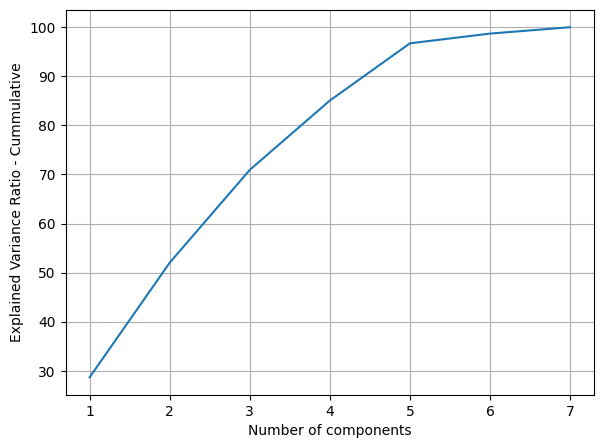

In [52]:
# Plot the Cummulative of Explained Variance Ratio
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, 8), np.cumsum(num_pipeline['pca'].explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')
plt.grid(True)
plt.show()

After checking the variance ratio, we found that using only 5 components out of 7 components for over 95% of the information in the data. Therefore, we will set the hyperparameter `n_components` to 5 for PCA.

In [53]:
# define pipeline before modeling to check number of cluster
pipeline_final_num = make_pipeline(StandardScaler(), PCA(random_state=0, n_components=5))

### Feature Encoding

In [54]:
# list categorical with different encoder
one_cat = ['person_home_ownership', 'loan_intent']
label_cat = ['cb_person_default_on_file']
ordi_cat = ['loan_grade']

# define label encoder
label_encoder = LabelEncoder()
# fit_transform train
X_train_balanced['cb_person_default_on_file'] = label_encoder.fit_transform(X_train_balanced['cb_person_default_on_file'])
# transform test
X_test['cb_person_default_on_file'] = label_encoder.transform(X_test['cb_person_default_on_file'])

# make pipeline for OneHotEncoder
pipeline_one = make_pipeline(OneHotEncoder(handle_unknown='ignore'))
# make pipeline for OrdinalEncoder
pipeline_ordi = make_pipeline(OrdinalEncoder())

### Pipeline

In [55]:
# Make column transformer for the data
preprocessing_pipeline = ColumnTransformer([
    ('pipe_num', pipeline_final_num, num),
    ('pipe_one', pipeline_one, one_cat),
    ('pipe_label', 'passthrough', label_cat),
    ('pipe_ordi', pipeline_ordi, ordi_cat)
])
preprocessing_pipeline

ColumnTransformer(transformers=[('pipe_num',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler()),
                                                 ('pca',
                                                  PCA(n_components=5,
                                                      random_state=0))]),
                                 ['person_age', 'person_income',
                                  'person_emp_length', 'loan_amnt',
                                  'loan_int_rate', 'loan_percent_income',
                                  'cb_person_cred_hist_length']),
                                ('pipe_one',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['person_home_ownership', 'loan_intent']),
                                ('pipe_label', 'passthrough',
                                 ['cb_person_default_on_file']),
                                ('pipe_ordi',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 ['loan_grade'])])

# vi. Model Definition

## KNN

In [56]:
# KNN model definition
model_knn = make_pipeline(preprocessing_pipeline, KNeighborsClassifier())
model_knn

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=5,
                                                                       random_state=0))]),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_length',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'loan_percent_income',
                                                   'cb_person_cred_hist_length']),
                                                 ('pipe_one',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['person_home_ownership',
                                                   'loan_intent']),
                                                 ('pipe_label', 'passthrough',
                                                  ['cb_person_default_on_file']),
                                                 ('pipe_ordi',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder())]),
                                                  ['loan_grade'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

## SVM

In [57]:
# SVM model definition
model_svm = make_pipeline(preprocessing_pipeline, SVC(random_state=0, probability=True))
model_svm

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=5,
                                                                       random_state=0))]),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_length',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'loan_percent_income',
                                                   'cb_person_cred_hist_length']),
                                                 ('pipe_one',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['person_home_ownership',
                                                   'loan_intent']),
                                                 ('pipe_label', 'passthrough',
                                                  ['cb_person_default_on_file']),
                                                 ('pipe_ordi',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder())]),
                                                  ['loan_grade'])])),
                ('svc', SVC(probability=True, random_state=0))])

## Decision Tree

In [58]:
# Decision Tree model definition
model_dt = make_pipeline(preprocessing_pipeline, DecisionTreeClassifier(random_state=0))
model_dt

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=5,
                                                                       random_state=0))]),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_length',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'loan_percent_income',
                                                   'cb_person_cred_hist_length']),
                                                 ('pipe_one',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['person_home_ownership',
                                                   'loan_intent']),
                                                 ('pipe_label', 'passthrough',
                                                  ['cb_person_default_on_file']),
                                                 ('pipe_ordi',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder())]),
                                                  ['loan_grade'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=0))])

## Random Forest

In [59]:
# Random Forest model definition
model_rf = make_pipeline(preprocessing_pipeline, RandomForestClassifier(random_state=0))
model_rf

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=5,
                                                                       random_state=0))]),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_length',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'loan_percent_income',
                                                   'cb_person_cred_hist_length']),
                                                 ('pipe_one',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['person_home_ownership',
                                                   'loan_intent']),
                                                 ('pipe_label', 'passthrough',
                                                  ['cb_person_default_on_file']),
                                                 ('pipe_ordi',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder())]),
                                                  ['loan_grade'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=0))])

## Boosting

In [60]:
# Boosting model definition
model_boost = make_pipeline(preprocessing_pipeline, AdaBoostClassifier(estimator=LogisticRegression(random_state=0), random_state=0))
model_boost

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=5,
                                                                       random_state=0))]),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_length',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'loan_percent_income',
                                                   'cb_person_cred_hist_length']),
                                                 ('pipe_one',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['person_home_ownership',
                                                   'loan_intent']),
                                                 ('pipe_label', 'passthrough',
                                                  ['cb_person_default_on_file']),
                                                 ('pipe_ordi',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder())]),
                                                  ['loan_grade'])])),
                ('adaboostclassifier',
                 AdaBoostClassifier(estimator=LogisticRegression(random_state=0),
                                    random_state=0))])

# vii. Model Training

## KNN

In [61]:
# Fitting KNN Model
model_knn.fit(X_train_balanced, y_train_balanced)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=5,
                                                                       random_state=0))]),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_length',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'loan_percent_income',
                                                   'cb_person_cred_hist_length']),
                                                 ('pipe_one',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['person_home_ownership',
                                                   'loan_intent']),
                                                 ('pipe_label', 'passthrough',
                                                  ['cb_person_default_on_file']),
                                                 ('pipe_ordi',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder())]),
                                                  ['loan_grade'])])),
                ('kneighborsclassifier', KNeighborsClassifier())])

## SVM

In [62]:
# Fitting SVM Model
model_svm.fit(X_train_balanced, y_train_balanced)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=5,
                                                                       random_state=0))]),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_length',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'loan_percent_income',
                                                   'cb_person_cred_hist_length']),
                                                 ('pipe_one',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['person_home_ownership',
                                                   'loan_intent']),
                                                 ('pipe_label', 'passthrough',
                                                  ['cb_person_default_on_file']),
                                                 ('pipe_ordi',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder())]),
                                                  ['loan_grade'])])),
                ('svc', SVC(probability=True, random_state=0))])

## Decision Tree

In [63]:
# Fitting Decision Tree Model
model_dt.fit(X_train_balanced, y_train_balanced)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=5,
                                                                       random_state=0))]),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_length',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'loan_percent_income',
                                                   'cb_person_cred_hist_length']),
                                                 ('pipe_one',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['person_home_ownership',
                                                   'loan_intent']),
                                                 ('pipe_label', 'passthrough',
                                                  ['cb_person_default_on_file']),
                                                 ('pipe_ordi',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder())]),
                                                  ['loan_grade'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=0))])

## Random Forest

In [64]:
# Fitting Random Forest Model
model_rf.fit(X_train_balanced, y_train_balanced)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=5,
                                                                       random_state=0))]),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_length',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'loan_percent_income',
                                                   'cb_person_cred_hist_length']),
                                                 ('pipe_one',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['person_home_ownership',
                                                   'loan_intent']),
                                                 ('pipe_label', 'passthrough',
                                                  ['cb_person_default_on_file']),
                                                 ('pipe_ordi',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder())]),
                                                  ['loan_grade'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=0))])

## Boosting

In [65]:
# Fitting Boosting Model
model_boost.fit(X_train_balanced, y_train_balanced)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=5,
                                                                       random_state=0))]),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_length',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'loan_percent_income',
                                                   'cb_person_cred_hist_length']),
                                                 ('pipe_one',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['person_home_ownership',
                                                   'loan_intent']),
                                                 ('pipe_label', 'passthrough',
                                                  ['cb_person_default_on_file']),
                                                 ('pipe_ordi',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder())]),
                                                  ['loan_grade'])])),
                ('adaboostclassifier',
                 AdaBoostClassifier(estimator=LogisticRegression(random_state=0),
                                    random_state=0))])

# viii. Model Evaluation

## Cross Validation

In [66]:
# define the function for cross validation
def cross_val(model, X_train, y_train, cv, scoring):
    recall_train_cross_val = cross_val_score(model,
                                        X_train,
                                        y_train,
                                        cv=cv,
                                        scoring=scoring)
    return recall_train_cross_val

In [67]:
# define cross validation for all the model
cross_val_knn = cross_val(model_knn, X_train_balanced, y_train_balanced, 5, 'recall')
cross_val_svm = cross_val(model_svm, X_train_balanced, y_train_balanced, 5, 'recall')
cross_val_dt = cross_val(model_dt, X_train_balanced, y_train_balanced, 5, 'recall')
cross_val_rf = cross_val(model_rf, X_train_balanced, y_train_balanced, 5, 'recall')
cross_val_boost = cross_val(model_boost, X_train_balanced, y_train_balanced, 5, 'recall')

In [68]:
# define the function for the evaluation
def performance_report(all_reports, model, X_train, y_train, X_test, y_test, cross_validation, name):
  # Model Prediction
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)
  try:
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_pred_proba)
  except AttributeError:
    auc_score = None
  score_reports = {
      'train - recall' : recall_score(y_train, y_pred_train),
      'crossval - recall' : cross_validation.mean(),
      'test - recall' : recall_score(y_test, y_pred_test),
      'auc - score' : auc_score
  }
  all_reports[name] = score_reports
  return all_reports

In [69]:
# define dictionary for the report
all_reports = {}

# define report for all the model
all_reports = performance_report(all_reports, model_knn, X_train_balanced, y_train_balanced, X_test, y_test, cross_val_knn, 'KNN')
all_reports = performance_report(all_reports, model_svm, X_train_balanced, y_train_balanced, X_test, y_test, cross_val_svm, 'SVM')
all_reports = performance_report(all_reports, model_dt, X_train_balanced, y_train_balanced, X_test, y_test, cross_val_dt, 'Decision Tree')
all_reports = performance_report(all_reports, model_rf, X_train_balanced, y_train_balanced, X_test, y_test, cross_val_rf, 'Random Forest')
all_reports = performance_report(all_reports, model_boost, X_train_balanced, y_train_balanced, X_test, y_test, cross_val_boost, 'Boosting')

# show the report
pd.DataFrame(all_reports)

,KNN,SVM,Decision Tree,Random Forest,Boosting
train - recall,0.902178,0.858521,1.000000,1.000000,0.822834
crossval - recall,0.851112,0.849081,0.845984,0.866442,0.820500
test - recall,0.705924,0.731312,0.704513,0.717207,0.755994
auc - score,0.864415,0.897328,0.776359,0.900211,0.850999


Based on the performance metrics provided for KNN, SVM, Decision Tree, Random Forest, and Boosting, here's an analysis of their results:

1. Train Recall
    - Decision Tree, Random Forest: All have a perfect recall of 1.0 on the training set, indicating they classify all training instances correctly. This is a strong indicator of overfitting, as these models are likely memorizing the training data rather than generalizing from it.
    - KNN (0.902), SVM (0.859) and Boosting(0.82): These models have lower recall values on the training set, suggesting they generalize better and are less prone to overfitting.
2. Cross-Validation Recall
    - Random Forest (0.866): This model performs the best in cross-validation, indicating that it maintains a good balance between complexity and generalization.
    - KNN (0.851), SVM (0.849) and Boosting (0.82) : The models perform similarly, showing consistent performance across different subsets of the data.
    - Decision Tree (0.846): This model has the lowest cross-validation recall, indicating it might be less robust across various data samples despite their perfect training recall.
3. Test Recall
    - SVM (0.731) and Boosting (0.76): These models have the highest test recall, suggesting it generalizes well to unseen data.
    - Random Forest (0.717): Follows closely behind, indicating it also performs well on the test set.
    - KNN (0.706): Slightly lower but still decent recall, suggesting reasonable generalization.
    - Decision Tree (0.704): This model shows the lowest test recall, reflecting potential overfitting since they performed perfectly on the training set but fail to maintain that performance on the test set.
4. AUC Score
    - Random Forest (0.900): This model has the highest AUC score, which indicates it is effective at distinguishing between positive and negative classes on unseen data.
    - SVM (0.897): Also performs very well, showing it has a strong predictive power.
    - KNN (0.864) and Boosting (0.85): Displays good performance, but lower than Random Forest and SVM.
    - Decision Tree (0.776): Both have the lowest AUC scores, reinforcing the overfitting trend observed earlier.

    Insights:
    - Overfitting in Tree-Based Models: The Decision Tree, and Random Forest show perfect recall on the training set but lower performance on the test set. This indicates they might be memorizing the training data rather than learning generalizable patterns. It is advisable to apply techniques such as pruning (for Decision Trees) or tuning hyperparameters (like max_depth or n_estimators for Random Forest) to mitigate overfitting.

    - SVM's Strong Generalization: The SVM model performs best on the test recall (0.731) and has a high AUC score (0.897), suggesting it generalizes well to unseen data. This model seems to be a good choice based on its performance metrics.

    - Boosting's Solid Performance: With an AUC score of 0.851, Boosting ranks just behind SVM and Random Forest in its ability to distinguish between classes. This indicates that Boosting performs well in ranking positive instances above negative ones but falls short of being the top model. While Boosting does not outperform SVM or Random Forest, it remains a strong second choice.

    - Random Forest's Balanced Performance: Random Forest is notable for having the highest AUC score (0.900) while maintaining a good balance between training and test recall. Its performance indicates it is effective for this dataset and can be a reliable choice.

    - KNN's Reliable Performance: KNN shows a reasonable balance between performance metrics, with good training, cross-validation, and test recall. Its AUC score is also decent, suggesting it could be a viable option, particularly for simpler decision boundaries.

    - Decision Trees Underperform: Decision Trees exhibit strong overfitting. They perform excellently on training data but poorly on unseen data. Tuning hyperparameters is crucial to improve their performance.

Based on the comprehensive analysis of our models, we have determined that the Support Vector Machine (SVM) is the most suitable choice for further development. The SVM model demonstrated the highest test recall at 0.731 and an impressive AUC score of 0.897, indicating its strong ability to generalize to unseen data and effectively distinguish between classes. By focusing on hyperparameter tuning, we aim to improve our model’s performance even more, ensuring that it not only meets but exceeds our objectives in accurately predicting outcomes.

## Hyperparameter Tuning

After identifying the best model between the 5 model, we can proceed with hyperparameter tuning using the best-performing model is Support Vector Machine (SVM).

In [70]:
# define grid search parameter
grid_search_params = {
    'svc__C': [1, 10], 
    'svc__gamma': ['scale', 'auto'],  
    'svc__kernel': ['linear', 'rbf', 'poly']
}

# difine gridsearch
clf_grid = GridSearchCV(model_svm, param_grid=grid_search_params, cv=5, scoring='recall', verbose=2, n_jobs=-1)
# fitting gridsearch
clf_grid.fit(X_train_balanced, y_train_balanced)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipe_num',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler()),
                                                                                         ('pca',
                                                                                          PCA(n_components=5,
                                                                                              random_state=0))]),
                                                                         ['person_age',
                                                                          'person_income',
                                                                          'person_emp_length',
                                                                          'loan_amnt',
                                                                          'loan_int_rate',
                                                                          'loan_percent_income',
                                                                          'cb_person_cred_hist_length']),
                                                                        ('pipe_one',
                                                                         P...
                                                                         ['person_home_ownership',
                                                                          'loan_intent']),
                                                                        ('pipe_label',
                                                                         'passthrough',
                                                                         ['cb_person_default_on_file']),
                                                                        ('pipe_ordi',
                                                                         Pipeline(steps=[('ordinalencoder',
                                                                                          OrdinalEncoder())]),
                                                                         ['loan_grade'])])),
                                       ('svc',
                                        SVC(probability=True,
                                            random_state=0))]),
             n_jobs=-1,
             param_grid={'svc__C': [1, 10], 'svc__gamma': ['scale', 'auto'],
                         'svc__kernel': ['linear', 'rbf', 'poly']},
             scoring='recall', verbose=2)

In [71]:
# Get Best Hyperparameters

best_params = clf_grid.best_params_
best_params

{'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}

In [72]:
# Get Best Estimator

best_estimator = clf_grid.best_estimator_
best_estimator

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=5,
                                                                       random_state=0))]),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_length',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'loan_percent_income',
                                                   'cb_person_cred_hist_length']),
                                                 ('pipe_one',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['person_home_ownership',
                                                   'loan_intent']),
                                                 ('pipe_label', 'passthrough',
                                                  ['cb_person_default_on_file']),
                                                 ('pipe_ordi',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder())]),
                                                  ['loan_grade'])])),
                ('svc', SVC(C=10, probability=True, random_state=0))])

In [73]:
# show the result of grid search
pd.DataFrame(clf_grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,param_svc__gamma,param_svc__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,947.533829,155.016381,5.992762,0.841432,1,scale,linear,"{'svc__C': 1, 'svc__gamma': 'scale', 'svc__ker...",0.750254,0.812944,0.840863,0.846662,0.824873,0.815119,0.034540,8
1,597.441810,118.823995,11.632311,2.923883,1,scale,rbf,"{'svc__C': 1, 'svc__gamma': 'scale', 'svc__ker...",0.725635,0.842386,0.897970,0.896167,0.883249,0.849081,0.064898,3
2,626.778355,111.165703,4.475222,1.193695,1,scale,poly,"{'svc__C': 1, 'svc__gamma': 'scale', 'svc__ker...",0.716244,0.818274,0.867513,0.868495,0.858376,0.825780,0.057764,7
3,818.522083,50.103191,5.728419,0.928911,1,auto,linear,"{'svc__C': 1, 'svc__gamma': 'auto', 'svc__kern...",0.750254,0.812944,0.840863,0.846662,0.824873,0.815119,0.034540,8
4,641.346777,109.169652,13.699906,2.466808,1,auto,rbf,"{'svc__C': 1, 'svc__gamma': 'auto', 'svc__kern...",0.729695,0.839848,0.894924,0.891597,0.879695,0.847152,0.061913,4
5,706.253637,66.175143,4.274930,0.629919,1,auto,poly,"{'svc__C': 1, 'svc__gamma': 'auto', 'svc__kern...",0.713452,0.810152,0.851523,0.852501,0.843147,0.814155,0.052658,12
6,1692.787169,174.403958,4.321434,0.719727,10,scale,linear,"{'svc__C': 10, 'svc__gamma': 'scale', 'svc__ke...",0.750000,0.812944,0.841117,0.846662,0.824873,0.815119,0.034673,8
7,526.096169,62.683099,8.161764,0.934703,10,scale,rbf,"{'svc__C': 10, 'svc__gamma': 'scale', 'svc__ke...",0.719797,0.850761,0.909391,0.904037,0.895431,0.855883,0.071122,1
8,697.771094,89.844887,2.859154,0.485548,10,scale,poly,"{'svc__C': 10, 'svc__gamma': 'scale', 'svc__ke...",0.719289,0.833503,0.887563,0.885758,0.879442,0.841111,0.064061,5
9,1397.812789,53.010090,1.743028,0.214188,10,auto,linear,"{'svc__C': 10, 'svc__gamma': 'auto', 'svc__ker...",0.750000,0.812944,0.841117,0.846662,0.824873,0.815119,0.034673,8


In [74]:
# predict train using best estimator
y_pred_train = best_estimator.predict(X_train_balanced)
# precict test using best estimator
y_pred_test = best_estimator.predict(X_test)

In [75]:
# Model Evaluation - Train Set
print('train:')
print(classification_report(y_train_balanced, y_pred_train))

train:
              precision    recall  f1-score   support

           0       0.88      0.95      0.92     19699
           1       0.95      0.87      0.91     19699

    accuracy                           0.91     39398
   macro avg       0.91      0.91      0.91     39398
weighted avg       0.91      0.91      0.91     39398



In [76]:
# Model Evaluation - Test Set
print('test:')
print(classification_report(y_test, y_pred_test))

test:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      5066
           1       0.75      0.72      0.73      1418

    accuracy                           0.89      6484
   macro avg       0.83      0.83      0.83      6484
weighted avg       0.88      0.89      0.88      6484



In [79]:
# checking AUC score
y_pred_proba = best_estimator.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_proba)
print(auc_score)

0.8988717058940462


Before Tuning (SVM):
- Train recall: 0.858
- Cross-validation recall: 0.849
- Test recall: 0.731
- AUC score: 0.897

After Tuning (SVM):
- Train recall: 0.87
- Cross-validation recall: 0.855883
- Test recall: 0.72
- AUC score: 0.898

1. Cross-Validation vs. Test Recall Divergence:
    - Cross-Validation Recall improved slightly (from 0.849 to 0.856) after tuning. This indicates that the model's ability to generalize across different training-validation splits improved, meaning it handles unseen data during cross-validation slightly better.
    - However, Test Recall dropped from 0.731 to 0.72, which suggests the model might be slightly overfitting to the validation folds or not fully capturing the patterns in the test set.

2. Overfitting Potential:
    - Train recall for Class 1 improved from 0.858 to 0.87 after tuning. However, this improvement didn’t translate to better test recall (it actually dropped). This could indicate overfitting, where the model is learning the training data too well but failing to generalize to new data.

3. Business Impact on Marketing Team:
    - The current model identifies 72% of true loan approvals, meaning that 28% of potential loan approvals are being missed. These missed approvals represent lost opportunities for loan conversions, directly impacting the marketing team’s ability to efficiently target high-probability applicants.

4. Long-Term Financial Growth and Sustainability
    - The model’s ability to consistently identify approved loans contributes to the long-term growth of the bank’s loan portfolio. With a higher recall, the bank can scale its loan products and tap into new customer segments by targeting more applicants who are likely to get approved.

5. High AUC Score: 
    - Both AUC scores indicate that the model has a strong ability to distinguish between positive and negative classes (i.e., approved and rejected loans). An AUC of 0.898 suggests excellent performance, as it is very close to 1, which would indicate perfect discrimination.

Based on the data, we can conclude that the SVM model, after tuning, is the best model with the parameters ('svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'rbf').

# ix. Model Saving

In [77]:
# Saving model
with open('deployment/model.pkl', 'wb') as file:
  pickle.dump(best_estimator, file)
# Saving the scaler
with open('deployment/encoder.pkl', 'wb') as file_2:
  pickle.dump(label_encoder, file_2)

# x. Model Inference

Model inference is done in a different file(`P1M2_san_inf.ipynb`).

# xi. Conclusion

## EDA

1. Applicant Demographics and Characteristics:

    - Age: Most applicants are aged between 20 and 30 years, indicating a younger demographic that may lack stable financial backgrounds, such as permanent jobs or homeownership.
    - Income: The average income is around $66,000, with a broad range from $4,000 to $6,000,000. Applicants with lower incomes are less likely to apply for loans, and outliers indicate high-income individuals are included.
    - Employment Length: The average employment length is around 4 years, with many applicants having short employment histories, which might affect their perceived stability.
    - Home Ownership: Most applicants are renters (50.48%), followed by those with mortgages (41.26%). Only 7.93% own their homes outright, suggesting a younger or less financially stable applicant pool.

2. Loan Characteristics:

    - Loan Amount: The average loan requested is $9,500, with amounts ranging from $500 to $35,000. Mid-sized loans (around $5,000 to $15,000) are more likely to be approved, while larger loans (above $15,000) show fewer approvals.
    - Loan Interest Rates: The average interest rate is 11%, with a range from 5% to 23%. Higher interest rates correlate with a greater likelihood of loan approval.
    - Loan Grade: The majority of applicants fall into loan grades A and B, indicating low risk. Only a small percentage of applicants are in the higher-risk categories (D, E, F, and G).
    - Loan Purpose: Most loans are for education (19.81%), followed by medical expenses, personal reasons, and debt consolidation, which suggests a diverse pool of loan intents.
    - Debt-to-Income Ratio: The average percentage of income allocated to loan repayment is around 17%. However, some applicants allocate up to 83%, indicating a risk of over-leveraging.

3. Creditworthiness:

    - Credit History: The average credit history length is 6 years, with a weak negative correlation to loan approval. Longer credit histories may slightly reduce the likelihood of approval.
    - Default History: Most applicants have no history of default, making them low-risk borrowers. This likely contributes to the predominance of applicants with loan grades A and B.

4. Loan Approval Trends:

    - Approval Rate: Only 21.82% of loans are approved, with the remaining 78.18% being rejected. This highly imbalanced data indicates a conservative loan approval process.
    - Correlations with Loan Approval:
        - Income: A moderate negative correlation between income and loan approval suggests that higher-income applicants are less likely to be approved, potentially due to applying for riskier loans.
        - Loan Amount & Interest Rate: Larger loans and those with higher interest rates are more likely to be approved, potentially as a way to offset the risk of approving higher-risk applicants.
        - Debt-to-Income Ratio: Loans with higher debt-to-income ratios are more likely to be approved, indicating that the bank is willing to approve loans for individuals dedicating more of their income to repayment.

## Model

1. Recall Performance Analysis:
    - Cross-Validation Improvement: The slight increase in cross-validation recall (from 0.849 to 0.855) indicates enhanced generalization but highlights the need for further refinement in capturing diverse applicant scenarios.
    - Test Recall Decline: The drop in test recall (from 0.731 to 0.72) post-tuning suggests potential overfitting, where the model fails to generalize effectively to new data. This indicates the need for more robust validation methods.
2. High AUC Performance: 
    - Both before and after tuning, the AUC score remains excellent (~0.897–0.898), indicating strong model performance in distinguishing between approved and rejected loans.
3. Opportunity Loss:
    - Missed Approvals: The current test recall implies that 28% of potential loan approvals are missed, which translates to significant revenue loss and missed opportunities for the marketing team to engage high-probability applicants.
4. Resource Allocation:
    - Reallocation for Efficiency: By identifying patterns in applicant data that correlate with successful approvals, the bank can allocate resources more effectively, focusing efforts on applicants who are statistically more likely to be approved.

### Advantage

Advantages of the Loan Approval Prediction Model
1. Improved Recall:
    - The model's cross-validation recall improved from 0.849 to 0.855883 after tuning, indicating better performance in identifying true positives. This means the model is more effective at recognizing applicants likely to be approved for loans.
2. Enhanced Generalization:
    - The increase in cross-validation recall suggests that the model has improved its ability to generalize from the training data to unseen data, leading to potentially better outcomes when deployed in real-world scenarios.
3. Focused Resource Allocation:
    - With a recall of 72% in the test set, the model can help the marketing team allocate resources more effectively by focusing on the 72% of applicants likely to be approved, thus increasing the efficiency of marketing efforts and reducing the time spent on less promising leads.


### Disadvantage

Disadvantages of the Loan Approval Prediction Model
1. Overfitting Risks:
    - Despite improvements, the model's training recall increased while test recall slightly decreased, indicating a potential overfitting issue.
2. Data Imbalance Issues:
    - If the dataset is imbalanced (with more rejections than approvals), the model may become biased towards predicting rejections. This can lead to a higher rate of false negatives, further reducing the model’s effectiveness in identifying eligible applicants.

## Business Recommendation

1. Enhanced Risk Assessment Framework
    - Integrate Alternative Data Sources: Expand the assessment criteria to include alternative data sources, such as utility payment histories, rental payment records, and social media data, to better evaluate applicants' creditworthiness, especially those with limited credit histories.

2. Targeted Outreach and Education Programs
    - Financial Literacy Initiatives: Launch financial literacy programs aimed at educating potential applicants about credit, loans, and the factors influencing approval decisions. Empowering applicants with knowledge can improve their profiles and increase successful conversions.
    - Collaborate with Educational Institutions: Partner with universities and vocational schools to offer exclusive loan products or incentives for students. This collaboration can enhance loan conversion rates within the education segment.

3. Personalized Loan Offerings
    - Customized Loan Products: Create tailored loan products that cater to specific demographics or loan purposes (e.g., education, small business, or debt consolidation). Customization can attract a broader range of applicants and increase approval rates.
    - Flexible Repayment Options: Offer flexible repayment plans based on the applicant's income and financial situation. Options like income-driven repayment plans can make loans more accessible to applicants with varying financial capabilities.

## Model Improvement

1. Cross-Validation Refinement
    - K-Fold Cross-Validation: Ensure that you are using cross-validation (typically 5 or 10 folds) to get a more reliable estimate of model performance, reducing the chances of overfitting.

2. Hyperparameter Tuning
    - Learning Rate Adjustment: Reduce the learning rate if your model is overfitting. Lower learning rates can make the model train slower but help in generalizing better.

3. Feature Engineering
    - Create New Features: Explore creating additional features from existing data, such as ratios (e.g., loan amount to income) or aggregating transaction data over time periods.

4. Threshold Tuning
    - Adjust Classification Threshold: Instead of using the default probability threshold of 0.5, you can adjust it to increase recall for approved loans. This can help in reducing the number of missed approvals.